<font color="green"><h2> **Welcome to ABT/HYD 182**


 ## **Lab 5**: Geopandas

### **Due Date: Feb 12 | 11:59 PM**
------------------------------------------------------------------------------

# Table of Contents

  * [Learning objectives](#section11)
  * [Dataset](#section12)
  * [Install Geopandas](#section13)
  * [Import packages](#section14)
  * [Local data paths](#section15)
  * [Exercise 1](#section1)
  * [Exercise 2](#section2)
  * [Exercise 3](#section3)
  * [Exercise 4](#section4)
  * [Exercise 5](#section5)
  * [Exercise 6](#section6)
  * [Exercise 7](#section7)
  * [Exercise 8](#section8)
  * [Exercise 9](#section9)

--------------------------------------------
<a name = "section11"></a>
Learning objectives
---------------------------------------------

* We will learn and practice how to:

    *   read shapefiles
    *   query from shapefiles
    *   attribute join
    *   visualize shapefiles

Recourses:
- [GeoPandas Tutorial: An Introduction to Geospatial Analysis](https://www.datacamp.com/tutorial/geopandas-tutorial-geospatial-analysis)
- [Geopandas: an introduction](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-2/geopandas-an-introduction.html)
- [Geopandas: Examples Gallery](https://geopandas.org/en/stable/gallery/index.html)


- [Pandas Cookbook](https://pandas.pydata.org/pandas-docs/version/0.15/cookbook.html#cookbook)
- [Pandas Geeting Started](https://www.w3schools.com/python/pandas/pandas_getting_started.asp)

----
<a name = "section12"></a>
Dataset
----

Download the datasets from Box at:
https://ucdavis.box.com/s/zra7vd52sefr805ho2c3me0uyssfgy0g

* *CA_county_boundaries*: shapefiles of California county boundaries
* *CAL_county_data.csv*: A CSV file that contains data (Violent Crime and Food Insecurity) at the county level.

Please note 'Violent Crime' data is replicated (identical) for the last three years!


**NOTE**: you may want to open the shapefiles in QGIS or ArcGIS Pro and the csv file in Excel to learn more about the datasets before reading them in Python.


Data Source: https://datausa.io/profile/geo/california


---
<a name = "section13"></a>
Install Geopandas
---
"GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and matplotlib for plotting." [source](https://geopandas.org/en/stable/)

A good source to learn *geopandas*: https://geopandas.org/en/stable/docs/user_guide.html


```python
# installing geopandas
! pip install geopandas
```

---
<a name = "section14"></a>
Import packages
---

Here we will import the required packages for this assignment.
Once you installed geopandas, you can import it. Please import other required packages like `numpy` and `matplotlib.pyplot`.

```python
# import the packages (libraries) we need for this assignment
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
```

In [1]:
# import the packages (libraries) we need for this assignment
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



---
<a name = "section15"></a>
Local data paths
---

Data is loaded from local paths (no Google Drive). Update the paths below if your data is elsewhere.

- **Shapefile**: CA_county_boundaries folder (contains CAL_county_boundaries.shp)
- **CSV**: CAL_county_data.csv

In [2]:
# Local paths for data (no Google Drive)
import os

# Base data directory - Week5/Data (absolute path for local run)
DATA_DIR = r"C:\mnarimani\1-UCDavis\9-Github\ABT182_Advance_GIS_UCDavis\code\colab\Week5\Data"
# Alternative: relative path when notebook is in Week5/Lab and you run from that folder:
# DATA_DIR = os.path.join(os.path.dirname(os.path.abspath(".")), "..", "Data")

# Path to shapefile (CAL_county_boundaries.shp inside CA_county_boundaries subfolder)
shp_path = os.path.join(DATA_DIR, "CA_county_boundaries", "CA_county_boundaries", "CAL_county_boundaries.shp")
# Path to CSV
csv_path = os.path.join(DATA_DIR, "CAL_county_data.csv")

print("Shapefile path:", shp_path)
print("CSV path:", csv_path)


Shapefile path: C:\mnarimani\1-UCDavis\9-Github\ABT182_Advance_GIS_UCDavis\code\colab\Week5\Data\CA_county_boundaries\CA_county_boundaries\CAL_county_boundaries.shp
CSV path: C:\mnarimani\1-UCDavis\9-Github\ABT182_Advance_GIS_UCDavis\code\colab\Week5\Data\CAL_county_data.csv


---
<a name = "section1"></a>
**Exercise 1**
---

- Write a code that reads the shapefile CAL_county_boundaries.shp

    * Once your Google Drive is mounted, from the left panel (Files > myGdrive) navigate to the folder you saved the dataset. Right click on the shapefile (CAL_county_boundaries.shp) and copy the path (right click > Copy path). If you need more instruction, please check [HERE](https://medium.com/ml-book/simplest-way-to-open-files-from-google-drive-in-google-colab-fae14810674).

    * Define a variable called shp_path and assign the copied path to it.
    * Note the path is a string, and therefore, it should be inside a quotation.
    * Now, read the shapefile using geopandas which was imported as gpd. The method (function) to read files is `cal = gpd.read_file()`.


- Once shapefile is loaded, write a few lines of code that
    - print the first 5 rows of the dataframe. Hint: use `head()` method.
    - print the shape (size) of the dataframe.
    - print the column names of the dataframe in terminal, similar to below:
    ```
    ['GEOID' 'County' 'geometry']
    ```
    - print a concise summary of a DataFrame. Hint: use `info()`.
    - return information about the coordinate reference system (CRS) of the shapefile. Hint: use `crs()`. Please note the projection, datum, and unit.




* Example:
    - [How to read a file with geopandas here]( https://geopandas.org/en/stable/docs/user_guide/io.html)
    - [Another example](https://geopandas.org/en/stable/docs/user_guide/data_structures.html)
    - [Example: CRS](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.crs.html)


In [4]:
# Read the shapefile (shp_path set in "Local data paths" cell above)
cal = gpd.read_file(shp_path)


In [5]:
# First 5 rows
print("First 5 rows:")
print(cal.head())

# Shape (size) of dataframe
print("\nShape:", cal.shape)

# Column names
print("\nColumn names:", list(cal.columns))

# Concise summary
print("\nInfo:")
cal.info()

# Coordinate reference system (CRS)
print("\nCRS:", cal.crs)





First 5 rows:
   GEOID         County                                           geometry
0  06091         Sierra  POLYGON ((-13431319.751 4821511.426, -13431312...
1  06067     Sacramento  POLYGON ((-13490651.476 4680831.603, -13490511...
2  06083  Santa Barbara  MULTIPOLYGON (((-13423116.772 4042044.149, -13...
3  06009      Calaveras  POLYGON ((-13428575.483 4627725.228, -13428534...
4  06111        Ventura  MULTIPOLYGON (((-13317853.594 3931602.414, -13...

Shape: (58, 3)

Column names: ['GEOID', 'County', 'geometry']

Info:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   GEOID     58 non-null     object  
 1   County    58 non-null     object  
 2   geometry  58 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 1.5+ KB

CRS: EPSG:3857


------------------------------
<a name = "section2"></a>
**Exercise 2**
------------------------------

- Calculate the area of each county

    * Let's first transform the projection to NAD83 UTM zone 10 N using EPSG for California: EPSG:26910
    `gdf = cal.to_crs(26910)`, here `cal` is the shapefile imported as a geopandas dataframe.  
    * Write a code that calculate the area of each county and add it in a new column with heading name of area to the dataframe. Since the area unit is in square meter, we can divide the area by 1,000,000 to convert it to square km before adding to the datafram.
    * print the first 5 columns to check if the new column called area is added.

Resources:
- [geopandas.GeoSeries.area](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.area.html)

In [6]:
# Project the GeoDataFrame to the target UTM CRS EPSG:26910
gdf = cal.to_crs(26910)

In [7]:
# Calculate area in square meters, then convert to square km (divide by 1,000,000)
gdf['area'] = gdf.geometry.area / 1_000_000
print(gdf[['County', 'area']].head())




          County         area
0         Sierra  2492.849861
1     Sacramento  2574.533427
2  Santa Barbara  9824.184248
3      Calaveras  2686.526574
4        Ventura  5732.726868


--------------------------------------------
<a name = "section3"></a>
**Exercise 3**
--------------------------------------------

- Write a code that calculates summary statistics (sum, mean, max, min, std) for area column (Hint: you may use `agg()`) and print them all in the terminal. For example,

    ```
    Sum: 425183.5215488783
    ```



Resources
- [pandas.DataFrame.agg](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html)

In [8]:
# Calculate summary statistics for area using .agg()
stats = gdf['area'].agg(['sum', 'mean', 'max', 'min', 'std'])
print("Sum:", stats['sum'])
print("Mean:", stats['mean'])
print("Max:", stats['max'])
print("Min:", stats['min'])
print("Std:", stats['std'])






Sum: 425183.3520880552
Mean: 7330.747449794056
Max: 52541.02102341636
Min: 600.1331527260606
Std: 8134.0353491073


--------------------
<a name = "section4"></a>
**Exercise 4**
-------------------

Make a query from dataframe

- Write a code that find the counties with largest and smallest area and print them in the terminal as follows:

```
San Bernardino county with 52541.02 km2 is the largest county.
San Francisco county with 600.13 km2 is the smallest county.
```

- Some of the useful methods include: `max()`, `idxmax()`, `loc()`.

Resources:
- [pandas.DataFrame.loc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)
- [Get the maximum value from the Pandas dataframe](https://www.geeksforgeeks.org/how-to-get-the-maximum-value-from-the-pandas-dataframe-in-python/)


In [9]:
# Largest area: get index of max, then use loc to get county name and area
idx_largest = gdf['area'].idxmax()
largest_county = gdf.loc[idx_largest, 'County']
largest_area = gdf.loc[idx_largest, 'area']
print(f"{largest_county} county with {largest_area:.2f} km2 is the largest county.")

# Smallest area
idx_smallest = gdf['area'].idxmin()
smallest_county = gdf.loc[idx_smallest, 'County']
smallest_area = gdf.loc[idx_smallest, 'area']
print(f"{smallest_county} county with {smallest_area:.2f} km2 is the smallest county.")




San Bernardino county with 52541.02 km2 is the largest county.
San Francisco county with 600.13 km2 is the smallest county.


------------------
<a name = "section5"></a>
**Exercise 5**
----------------

Visualization of shapefile

**Part A**

* Write a code to visualize our shapefile using `plot()` function.

```python
# example
gdf.plot() # it shows the boundary of counties
```

* We can pass some arguments (inputs) to `plot()` function. Please try the following and check what each of them does:
    * figsize = (7,7)
    * alpha = 0.8
    * color = 'green'             # other colors: 'red', 'cyan', 'salmon', 'blue', 'orange', any more...
    * edgecolor = 'k'

* Please feel free to test other colors and edge colors.

Resources:
- https://geopandas.org/en/stable/docs/user_guide/mapping.html
* You may check [this website](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html) or [this website](https://geopandas.org/en/stable/docs/user_guide/mapping.html) to learn more about plotting in geopandas (what  the potential inputs are and what the output is).



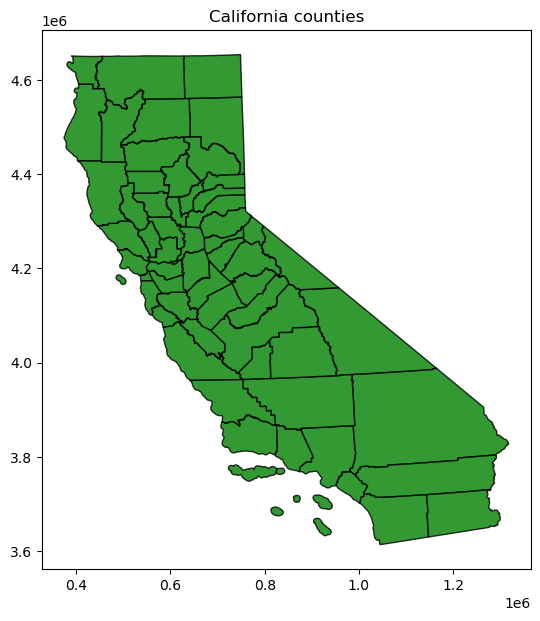

In [10]:
# Part A: visualize shapefile with plot()
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
gdf.plot(ax=ax, alpha=0.8, color='green', edgecolor='k')
plt.title('California counties')
plt.show()



**Part B**
- Now, let's plot the counties and assign a colormap, like viridis, to each based on their area. To do this, we should simply pass `column = area` and `cmap = 'viridis'` as inputs for `plot()` function.


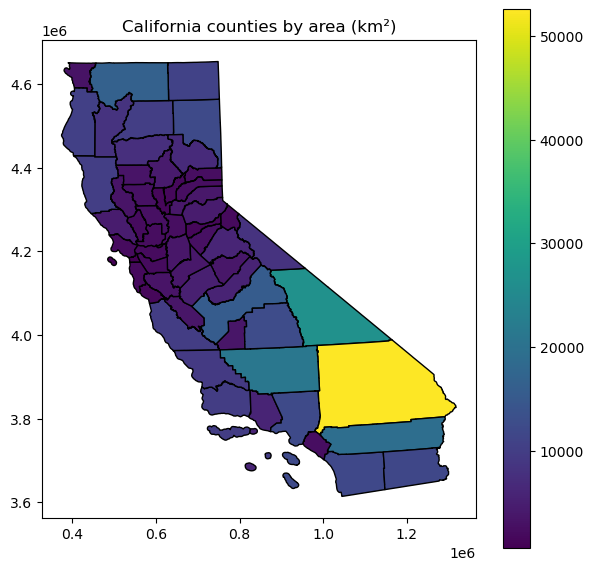

In [11]:
# Part B: plot counties colored by area (viridis colormap)
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
gdf.plot(ax=ax, column='area', cmap='viridis', legend=True, edgecolor='k')
plt.title('California counties by area (km²)')
plt.show()





**Part C**
- Install `mapclassify` to scale colormap with the scheme option such as ‘equal_interval’, ‘fisher_jenks’, ‘fisher_jenks_sampled’, ‘headtail_breaks’, ‘jenks_caspall’, ‘jenks_caspall_forced’, ‘jenks_caspall_sampled’, ‘max_p_classifier’, ‘maximum_breaks’, ‘natural_breaks’, ‘quantiles’, ‘percentiles’, ‘std_mean’ or ‘user_defined’.
- Re-plot the Part B graph with two other scheme options from the list above, such as 'fisher_jenks' and 'quantiles'.
- Use 'OrRd' as your colormap.
- Bonus (not required): let's assign a title to the plot. The title can be the name of the scheme you used, e.g., 'Fisher Jenks'. Here you can find an example: https://gis.stackexchange.com/questions/265520/groupby-ploting-give-each-plot-title-name

In [ ]:
# run this cell to install mapclassify to scale color map with the scheme option
#! pip install mapclassify


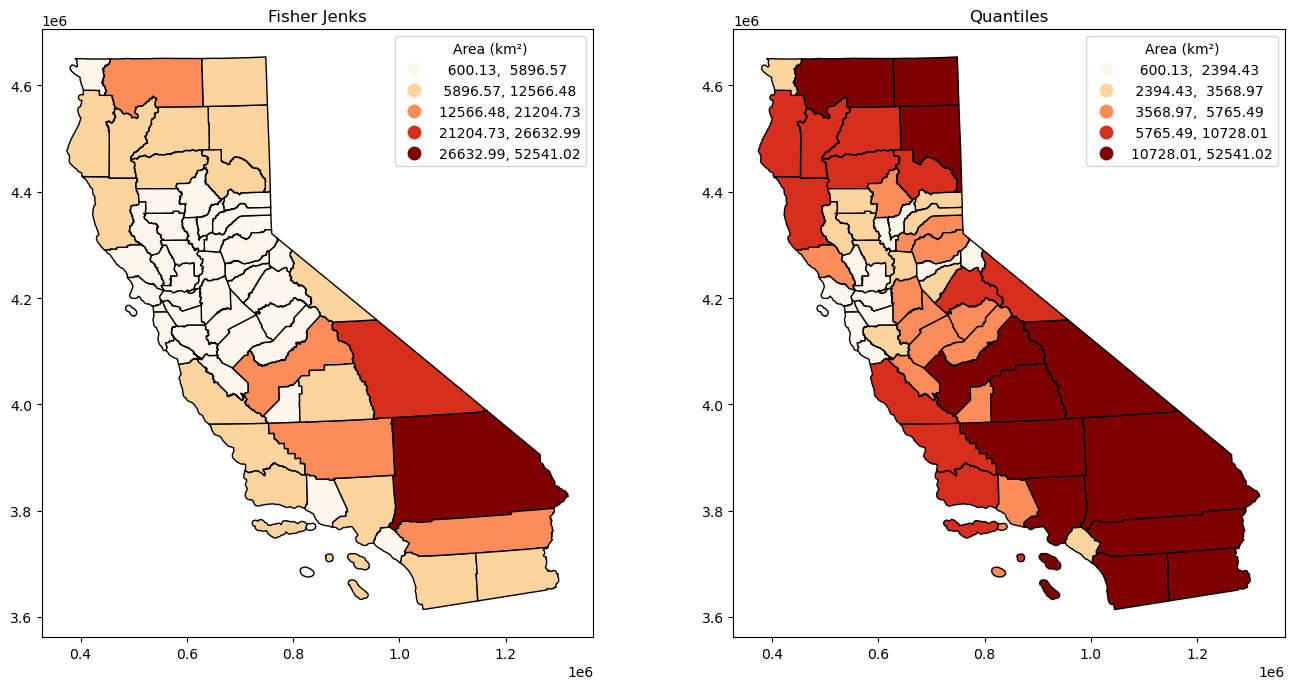

In [12]:
# Part C: Re-plot with scheme options 'fisher_jenks' and 'quantiles', colormap 'OrRd'
import mapclassify

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Fisher Jenks
gdf.plot(ax=axes[0], column='area', cmap='OrRd', legend=True, edgecolor='k',
         scheme='fisher_jenks', legend_kwds={'title': 'Area (km²)'})
axes[0].set_title('Fisher Jenks')

# Quantiles
gdf.plot(ax=axes[1], column='area', cmap='OrRd', legend=True, edgecolor='k',
         scheme='quantiles', legend_kwds={'title': 'Area (km²)'})
axes[1].set_title('Quantiles')

plt.tight_layout()
plt.show()



### Reading county data file (reading csv file)

 Once your Google Drive is mounted, from the left panel (Files > myGdrive) navigate to the folder you saved the csv file. Right click on the file (CAL_county_data.csv) and copy the path (right click > Copy path). If you need more instruction, please check [HERE](https://medium.com/ml-book/simplest-way-to-open-files-from-google-drive-in-google-colab-fae14810674).

* Define a variable called csv_path and assign the copied path to it.
* Note the path is a string, and therefore, it should be inside a quotation.
* Now, read the csv file using pandas which was imported as `pd`. The function to read files is **`df = read_csv()`**.
* The data is imported as a dataframe. Please note the dataset has *no spatial information*, so we use pandas instead of geopandas. Therefore, we don't have any geometry column.  
* Check the first 10 columns of the dataframe (display them in the terminal by using `head()`).

**NOTE**
- Please note you can load the csv file using `gdf`. In this case, the geometry columns will be empty (None).

#### Dataframe as interactive table
* You can interact with the dataframe by clicking on the icon on the left side of the table displayed in the terminal after runing `head()` method. The icon is highlighted in the screenshot below:
![](https://drive.google.com/uc?export=view&id=116ADQoJLsQEiYoqeJVtxucVAA5_xBfI6)

* A few interesting features of the data table display:

  - Clicking the <button>Filter</button> button in the upper right allows you to search for terms or values in any particular column.
  - Clicking on any column title lets you sort the results according to that column's value.
  - The table displays only a subset of the data at a time. You can navigate through pages of data using the controls on the lower right.
  [source](https://colab.research.google.com/notebooks/data_table.ipynb)

In [13]:
# Read CSV (csv_path set in "Local data paths" cell)
df = pd.read_csv(csv_path)
print("First 10 rows of dataframe:")
print(df.head(10))



First 10 rows of dataframe:
   ID Year  Year  Violent Crime  Food Insecurity                   County  \
0     2021  2021     628.781982            0.091       Alameda County, CA   
1     2021  2021     442.477875            0.145        Alpine County, CA   
2     2021  2021     237.070740            0.109        Amador County, CA   
3     2021  2021     327.057312            0.142         Butte County, CA   
4     2021  2021     327.245727            0.122     Calaveras County, CA   
5     2021  2021     200.958054            0.138        Colusa County, CA   
6     2021  2021     336.027802            0.085  Contra Costa County, CA   
7     2021  2021     609.109192            0.167     Del Norte County, CA   
8     2021  2021     217.583939            0.091     El Dorado County, CA   
9     2021  2021     541.779236            0.152        Fresno County, CA   

   ID Geography          Slug Geography  
0  05000US06001       alameda-county-ca  
1  05000US06003        alpine-county-ca 

------
<a name = "section6"></a>
**Exercise 6**
------

**Merging dataframes**

There are two ways to combine datasets in GeoPandas – **attribute** joins and **spatial** joins.

**attribute** joins:
In an attribute join, a [GeoSeries](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.html) or [GeoDataFrame](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html#geopandas.GeoDataFrame) is combined with a regular pandas.Series or pandas.DataFrame based on a common variable. This is analogous to normal merging or joining in pandas.

**spatial** joins:
In a spatial join, observations from two GeoSeries or GeoDataFrame are combined based on their spatial relationship to one another.


* As noted above, the county data is imported as a dataframe with no spatial information, so we only have the name of the county and not the location and boundary. Therefore, spatial join is not an option as the geometry column is missing (if you used `pd` to import the csv file) or empty (None) (if you used `gpd` to import the csv file). However, both dataframes `gdf` and `df` share a common attribute (column), which is the name of counties. Through attribute join, we can assign the spatial information of each county from the `gdf` (or `cal`) shapefile to the county dataframe (`df`).

* The steps above will work if the county name is the same for both dataframes. However, in our case, there is a subtle difference. Check the county column in CSV file and shapefile. For instance, the Yolo county in county shapefile is listed as 'Yolo', but in the CSV file, it is listed as 'Yolo County, CA'. So we need to do data cleaning before doing attribute join.

* For data cleaning, we can remove the extra parts by the following command:
    ```python
    # delete the extra part (' County, CA')
    df['County'] = df['County'].str.replace(' County, CA', '')
    ```
  * Here, we delete ' County, CA' part and replace it with nothing ('  ').
    
* Now, we want to merge two dataframes that share one similar column `County`. To do this, we can use `merge()` method. Here are a few tips:

  * it is recommended to use the `merge()` method called from the spatial dataframe (gdf).        
```python
        gdf.merge(df, ...) # and not df.merge(gdf, ...)
```
*
  * specify the column you want to join `on = 'County'`.
  * specify the argument `how`, i.e., `how = 'right'`. What happens if we choose left (`how = 'left'`)?
  * Display the first 5 rows of the new merged dataframe (you may assign the new merged dataframe to a variable called merged_df) to see if the two dataframes are merged properly with the geometry column.
    
* What is the size of the new merged dataframe (write a code that prints the result in the terminal)? The number of rows should be the same as the df but with more columns as we added new columns from the gdf dataframe.   


Resources:
- [Attribute joins](https://geopandas.org/en/stable/docs/user_guide/mergingdata.html#attribute-joins)
- [pandas.DataFrame.merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html#pandas.DataFrame.merge)

In [14]:
# Delete the extra part (' County, CA') so county names match the shapefile
df['County'] = df['County'].str.replace(' County, CA', '')


In [15]:
# Merge gdf (spatial) with df on 'County'; use how='right' to keep all CSV rows
merged_gdf = gdf.merge(df, on='County', how='right')
print("First 5 rows of merged dataframe:")
print(merged_gdf.head())
print("\nSize of merged dataframe (rows, columns):", merged_gdf.shape)




First 5 rows of merged dataframe:
   GEOID     County                                           geometry  \
0  06001    Alameda  POLYGON ((563386.330 4173576.099, 563306.147 4...   
1  06003     Alpine  POLYGON ((754511.837 4287672.965, 754519.897 4...   
2  06005     Amador  POLYGON ((672067.079 4261069.504, 672066.753 4...   
3  06007      Butte  POLYGON ((598270.037 4376615.939, 598278.770 4...   
4  06009  Calaveras  POLYGON ((707043.294 4246317.962, 707072.088 4...   

          area  ID Year  Year  Violent Crime  Food Insecurity  ID Geography  \
0  2126.013724     2021  2021     628.781982            0.091  05000US06001   
1  1926.947079     2021  2021     442.477875            0.145  05000US06003   
2  1569.795346     2021  2021     237.070740            0.109  05000US06005   
3  4341.862640     2021  2021     327.057312            0.142  05000US06007   
4  2686.526574     2021  2021     327.245727            0.122  05000US06009   

        Slug Geography  
0    alameda-county-c

----
<a name = "section7"></a>
**Exercise 7**

**Query from dataframe**

Panda dataframe (or geopanda) makes the query process very efficient.

* Write a function that gets a variable name (e.g., Violent Crime or Food Insecurity) and a county name (e.g., Yolo) as inputs and returns the mean value for the variable across all the years we have data.

    * input of the function are
        *  variable (i.e., the name of the column): in this case we have two variables, Violent Crime and Food Insecurity
        *  county: Users can pass the name of a county OR say 'all' to get a mean values per each county.

    * you may define your function as follows:

    ```python
    def df_mean(df, column, county='all'):
        ...
        ...
    ```

* Call your function `df_mean` to find Violent Crime and Food Insecurity for Yolo county and 'all' county. Thus, you need to call your function four times.   

``` python
# example
crime_in_yolo = df_mean(df, column='Violent Crime', county='Yolo')
print('\nViolent Crime mean for Yolo county: ', crime_in_yolo)

crime_all_county = df_mean(df, column='Violent Crime', county='all')
print('\nViolent Crime mean for all California counties: ', crime_all_county)
```

* Hint: you may want to use `groupby()` to  group the data by county first and then take the mean for each county across time (years).

* Resource:
  * [Document and Examples](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html).

In [16]:
def df_mean(df, column, county='all'):
    """
    Return mean of column across years.
    county: name of county (e.g. 'Yolo') or 'all' for mean per county (then overall mean of those).
    """
    if county == 'all':
        # Mean for each county across years, then mean of those values (overall)
        return df.groupby('County')[column].mean().mean()
    else:
        # Mean for the specified county across all years
        return df[df['County'] == county][column].mean()



In [17]:
# Call df_mean four times: Violent Crime and Food Insecurity for Yolo and 'all'
crime_in_yolo = df_mean(df, column='Violent Crime', county='Yolo')
print('Violent Crime mean for Yolo county: ', crime_in_yolo)

crime_all_county = df_mean(df, column='Violent Crime', county='all')
print('Violent Crime mean for all California counties: ', crime_all_county)

food_in_yolo = df_mean(df, column='Food Insecurity', county='Yolo')
print('Food Insecurity mean for Yolo county: ', food_in_yolo)

food_all_county = df_mean(df, column='Food Insecurity', county='all')
print('Food Insecurity mean for all California counties: ', food_all_county)



Violent Crime mean for Yolo county:  304.97696685
Violent Crime mean for all California counties:  411.33313175797423
Food Insecurity mean for Yolo county:  0.14749999812499998
Food Insecurity mean for all California counties:  0.14247413826939653


----
<a name = "section8"></a>
**Exercise 8**
----

### Query from grouped data

* Please write a code to find the answers to the following questions (no need to write a function):

1. What county has the highest 'Food Insecurity' value and in which year?
      * for this question, you need to first find the maximum value in 'Food Insecurity' column (`max()`) and it's index (`idxmax()`). Assign the index of the maximum value to a variable called row_index.
      * Use the row_index and the requested column as inputs for `loc()` to find the county and year value in which we have the maximum 'Food Insecurity'.

      * Check the resources listed below to find useful examples.

Resources:
* [Python help for `loc()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html)

In [18]:
# Q1: County and year with highest Food Insecurity
row_index = df['Food Insecurity'].idxmax()
county_max = df.loc[row_index, 'County']
year_max = df.loc[row_index, 'Year']
value_max = df.loc[row_index, 'Food Insecurity']
print(f"Highest 'Food Insecurity': {county_max} in year {year_max} (value: {value_max})")



Highest 'Food Insecurity': Imperial in year 2014 (value: 0.277999997)


 2. Find the mean of 'Violent Crime' for each county averaged across the years we have data.
      * For this question, you can use your function defined above (`def_mean`)

       or
       
      * First group the dataframe by 'County' using `groupby()`.
      * Specify the columns you are interested in ('Violent Crime').
      * Use `mean()` to take the average.


In [19]:
# Q2: Mean of Violent Crime for each county (averaged across years)
violent_crime_by_county = df.groupby('County')['Violent Crime'].mean()
print(violent_crime_by_county)


County
Alameda            686.654976
Alpine             588.193882
Amador             266.348240
Butte              316.043449
Calaveras          270.552551
Colusa             208.888985
Contra Costa       366.381989
Del Norte          551.750252
El Dorado          230.968485
Fresno             532.612328
Glenn              349.682701
Humboldt           375.717258
Imperial           331.866329
Inyo               491.876476
Kern               554.519989
Kings              433.415249
Lake               521.202450
Lassen             448.493183
Los Angeles        471.325916
Madera             575.817192
Marin              189.811447
Mariposa           372.566200
Mendocino          563.897236
Merced             586.635887
Modoc              497.101524
Mono               297.606375
Monterey           441.612118
Napa               381.728909
Nevada             287.637043
Orange             215.062042
Placer             182.814886
Plumas             543.631592
Riverside          295.564465
Sac

 3. Find the mean of 'Violent Crime' and 'Food Insecurity' for all counties (entire California) per each year.

Expected result:
```
      Violent Crime Food Insecurity
Year
2014	408.654482	0.167086
2015	403.454654	0.160190
2016	403.454654	0.154569
2017	406.641379	0.146621
2018	406.641286	0.137672
2019	420.606200	0.130655
2020	420.606200	0.123897
2021	420.606200	0.119103
```

In [20]:
# Q3: Mean of Violent Crime and Food Insecurity for all counties per year
means_by_year = df.groupby('Year')[['Violent Crime', 'Food Insecurity']].mean()
print(means_by_year)



      Violent Crime  Food Insecurity
Year                                
2014     408.654482         0.167086
2015     403.454654         0.160190
2016     403.454654         0.154569
2017     406.641379         0.146621
2018     406.641286         0.137672
2019     420.606200         0.130655
2020     420.606200         0.123897
2021     420.606200         0.119103


 4. What year has the highest crime rate in California? (Please note 'Violent Crime' data is replicated (identical) for the last three years!)


In [21]:
# Q4: Year with highest crime rate in California (use mean Violent Crime per year)
mean_crime_by_year = df.groupby('Year')['Violent Crime'].mean()
year_highest = mean_crime_by_year.idxmax()
print(f"Year with highest crime rate in California: {year_highest}")


Year with highest crime rate in California: 2019


-------
<a name = "section9"></a>
**Exercise 9**
-------

**Visualization**

* Write a function that gets four values to plot a map
 * inputs:
    * a geopandas dataframe
    * column: 'Violent Crime' or 'Food Insecurity'
    * year: an integer value (e.g., 2020)  
    * colormap: an string to specify what colormap is used. For the list of colormap, please check [this website](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

* call your function to plot the requested variable for the specified year across California. Call your function with the following inputs:

```python
gdf_plot(merged_gdf, column='Violent Crime', year = 2019, cmap = 'viridis')
gdf_plot(merged_gdf, column='Violent Crime', year = 2021, cmap = 'YlOrBr')
gdf_plot(merged_gdf, column='Violent Crime', year = 2021, cmap = 'copper')
```

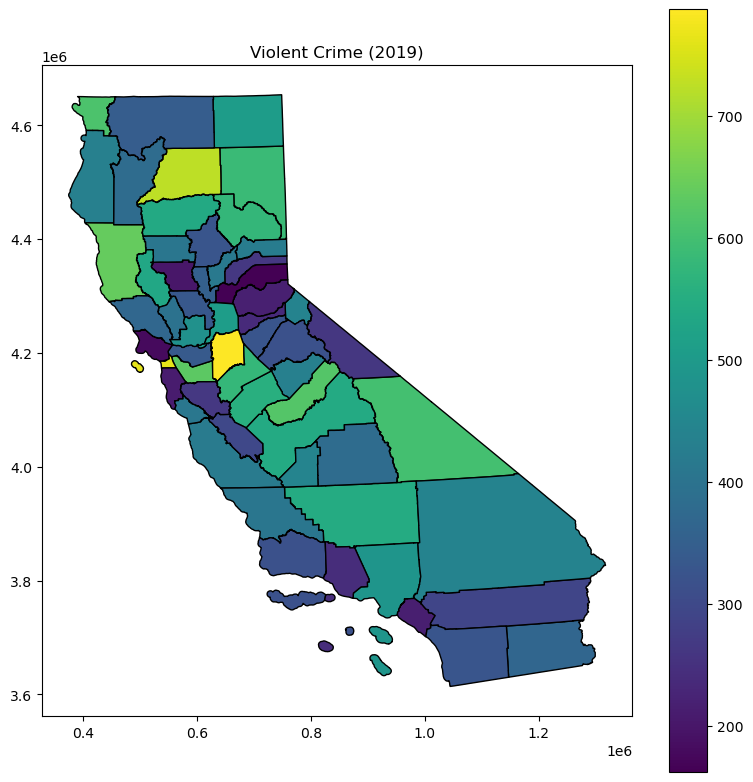

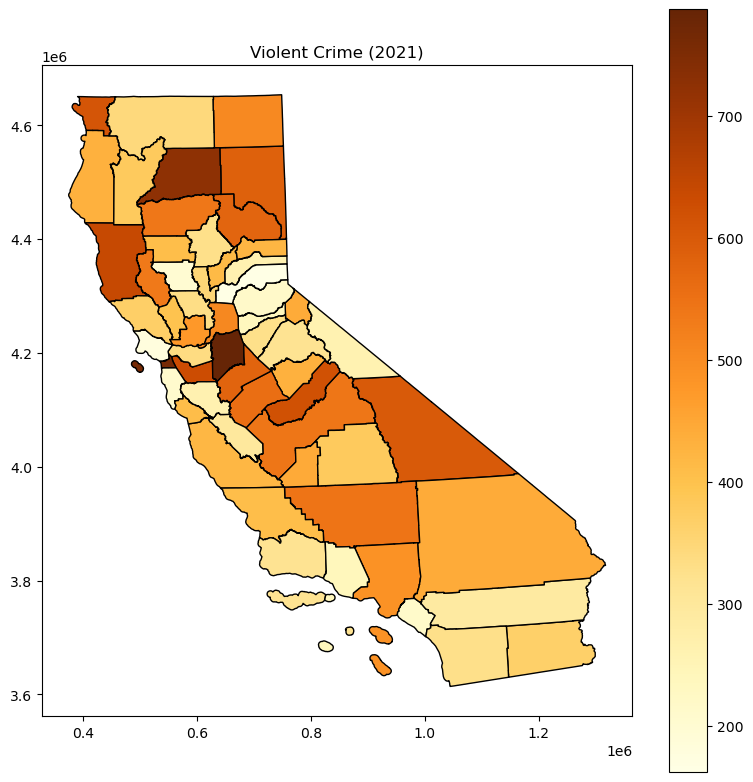

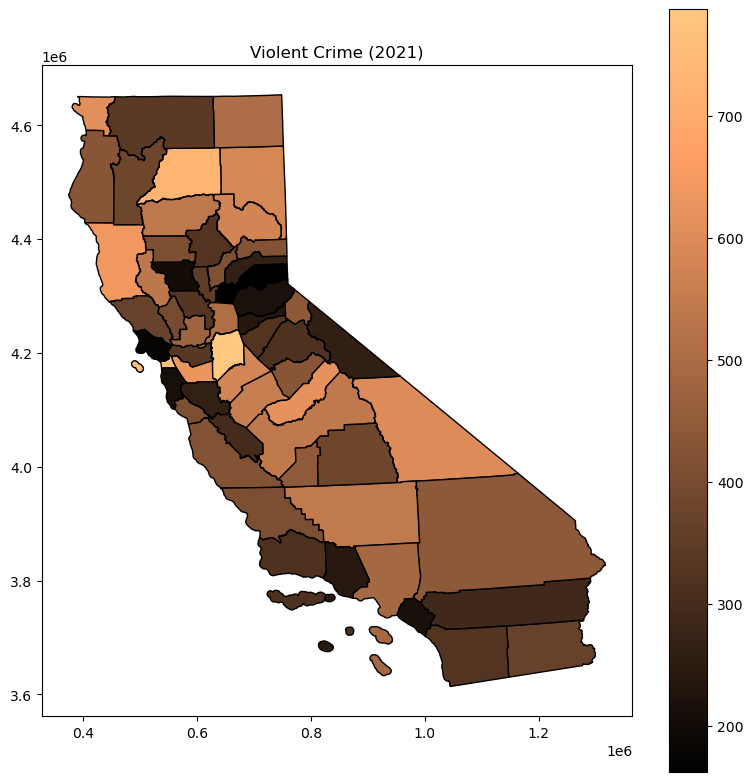

In [22]:
def gdf_plot(gdf, column, year, cmap):
    """Plot a choropleth map for the given column and year."""
    # Filter to the requested year
    gdf_year = gdf[gdf['Year'] == year].copy()
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    gdf_year.plot(ax=ax, column=column, cmap=cmap, legend=True, edgecolor='k')
    ax.set_title(f'{column} ({year})')
    plt.tight_layout()
    plt.show()

# Call with the requested inputs
gdf_plot(merged_gdf, column='Violent Crime', year=2019, cmap='viridis')
gdf_plot(merged_gdf, column='Violent Crime', year=2021, cmap='YlOrBr')
gdf_plot(merged_gdf, column='Violent Crime', year=2021, cmap='copper')

